### notes

- data range that best matches the theory and assumptions
- the linear fit was done using the form
$$U = \dfrac{e}{m} \dfrac{(Br)^2}{2}.$$

r = 0.05 m: 165990531185.512
r = 0.04 m: 165354956224.03665
r = 0.03 m: 167102917160.34003
r = 0.02 m: 150009798807.3348


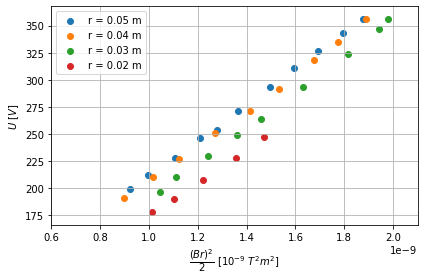

In [35]:
import pandas as pd
import codecs
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
from IPython.display import display, Latex

# parameters
mu = 4 * np.pi * 10**(-7)
n = 154
R = 0.2  # dR = 0.005
theo = 1.759 * 10**(11)

def pltset(x, y, title=''):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.grid()
    plt.legend()
    
def B(i):
    return ((4/5)**(3/2) * mu * n / R) * i

def fit(r, I, U):
    U = np.array(U)
    mag = B(np.array(I))
    xx = np.square(mag) * r**2 / 2
    fit = stats.linregress(xx, U)
    print('r = {} m: {}'.format(r, fit[0]))
    plt.scatter(xx, U, label='r = {} m'.format(r))
    
# r = 5 cm
# U5 = np.array([356, 343, 327, 311, 293, 271, 254, 246, 228, 212, 199, 184, 167])
# I5 = np.array([1.77, 1.73, 1.68, 1.63, 1.58, 1.51, 1.46, 1.42, 1.36, 1.29, 1.24, 1.16, 1.06])
U5 = np.array([356, 343, 327, 311, 293, 271, 254, 246, 228, 212, 199])
I5 = np.array([1.77, 1.73, 1.68, 1.63, 1.58, 1.51, 1.46, 1.42, 1.36, 1.29, 1.24])

    
# r = 4 cm
U4 = np.array([356, 335, 318, 292, 271, 251, 227, 210, 191])
I4 = np.array([2.22, 2.15, 2.09, 2, 1.92, 1.82, 1.71, 1.63, 1.53])

# r = 3 cm
U3 = np.array([356, 347, 324, 293, 264, 249, 230, 210, 197])
I3 = np.array([3.03, 3, 2.9, 2.75, 2.6, 2.51, 2.4, 2.27, 2.2])

# r = 2 cm
# U2 = np.array([247, 228, 208, 190, 178, 164, 158, 140])
# I2 = np.array([3.92, 3.76, 3.57, 3.39, 3.25, 3.06, 2.76, 2.57])
U2 = np.array([247, 228, 208, 190, 178])
I2 = np.array([3.92, 3.76, 3.57, 3.39, 3.25])

# # r = 4 cm again
# U = np.array([187, 197, 207, 216, 228, 335, 250, 257, 272, 281, 292, 308, 318, 330])
# I = np.array([1.495, 1.545, 1.60, 1.645, 1.705, 1.755, 1.80, 1.85, 1.90, 1.95, 2.005, 2.055, 2.10, 2.15])

# r = 4 cm again again
# U = np.array([356, 345, 336, 319, 307, 297, 284, 274, 266, 255, 246, 236, 228, 222, 214, 208, 201, 192, 184, 180])
# I = np.array([3.02, 3.00, 2.94, 2.87, 2.81, 2.75, 2.70, 2.65, 2.60, 2.54, 2.48, 2.44, 2.39, 2.34, 2.30, 2.25, 2.20,
#               2.12, 2.07, 2.02])

xl = '$\dfrac{(Br)^2}{2}\ [10^{-9}\ T^2m^2]$'
yl = '$U\ [V]$'
fit(0.05, I5, U5)
fit(0.04, I4, U4)
fit(0.03, I3, U3)
fit(0.02, I2, U2)
plt.xlim(0.0000000006, 0.0000000021)
pltset(xl, yl)
plt.tight_layout()
plt.savefig('specific_charge.pdf')

In [36]:
# def em(V, slope):  # from B vs 1/r
#     val = 2 * V * slope ** (-2)  # e/m compared to theoretical value
#     #display(Latex('$({:.4f} \pm {}) \times 10^{11}$'.format(val / (10**11), 1)))
#     return val  
    
# d = np.array([0.02, 0.03, 0.04, 0.05])

# V1 = 200
# I1 = np.array([3.5, 2.25, 1.59, 1.26])
# B1 = B(I1)
# # fit1 = stats.linregress(1/d, B1)
# # k1 = em(V1, fit1[0])

# V2 = 150
# I2 = np.array([2.85, 1.81, 1.38, 0.97])
# B2 = B(I2)
# fit2 = stats.linregress(1/d, B2)
# k2 = em(V2, fit2[0])

# V3 = 250
# I3 = np.array([3.93, 2.52, 1.83, 1.46])
# B3 = B(I3)
# fit3 = stats.linregress(1/d, B3)
# k3 = em(V3, fit3[0])

# plt.plot(1/d, B1)
# plt.plot(1/d, B2)
# plt.plot(1/d, B3)

# print(np.array([k1, k2, k3]))
# print((np.array([k1, k2, k3]) / theo - 1) * 100)
# print(fit1[2]**2, fit2[2]**2, fit3[2]**2)

# y = np.array([V1, V2, V3])
# for i in range(0, 4):
#     x = np.array([(B1[i] * d[i])**2 / 2, (B2[i] * d[i])**2 / 2, (B3[i] * d[i])**2 / 2])
#     plt.scatter(x, y)
#     plt.xlim(min(x), max(x))
#     plt.show()
#     fit = stats.linregress(x, y)
#     print(fit[0] / theo)